<a href="https://colab.research.google.com/github/R-Bhavana-0103/Analytics_in_action/blob/main/Strategic_Insights_into_Real_Estate_Sales_Trends%2C_Valuations%2C_and_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Strategic Insights into Real Estate Sales: Trends, Valuations, and Predictions**

The real estate market is ever-changing, shaped by economic trends, demographics, and local factors. In a data-driven world, uncovering patterns in pricing, demand, and valuation is essential for informed decision-making.

This case study analyzes two decades of real estate sales data (2001–2022), exploring trends in property pricing, valuation accuracy, and location-based insights. Using advanced analytics and geospatial tools, we aim to identify key market dynamics, such as high-demand property types, areas of rapid appreciation, and seasonal pricing trends.

By bridging raw data with actionable insights, this study empowers stakeholders to navigate the complexities of the real estate market and make strategic decisions.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib.ticker as mticker
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Loading the dataset

In [ ]:
file_path = '/content/Real_Estate_Sales_2001-2022_GL.xlsx'
sheet_name = 'Real_Estate_Sales_2001-2022_GL'
data = pd.read_excel(file_path, sheet_name=sheet_name)

Displaying basic information of the dataset

In [ ]:
data.info()
print("\nSample Data:")
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1048575 non-null  int64  
 1   List Year         1048575 non-null  int64  
 2   Date Recorded     1048573 non-null  object 
 3   Town              1048575 non-null  object 
 4   Address           1048524 non-null  object 
 5   Assessed Value    1048575 non-null  int64  
 6   Sale Amount       1048575 non-null  float64
 7   Sales Ratio       1048575 non-null  float64
 8   Property Type     666129 non-null   object 
 9   Residential Type  655012 non-null   object 
 10  Non Use Code      301508 non-null   object 
 11  Assessor Remarks  160743 non-null   object 
 12  OPM remarks       11422 non-null    object 
 13  Location          249058 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 112.0+ MB

Sample Data:
   Serial Number  List Ye

Data Cleaning

In [ ]:
#1 Handling missing values

data = data.dropna()

In [ ]:
#2 Converting columns into appropriate data types

data['Date Recorded'] = pd.to_datetime(data['Date Recorded'])
data['List Year'] = pd.to_numeric(data['List Year'], errors='coerce')
data['Sale Amount'] = pd.to_numeric(data['Sale Amount'], errors='coerce')
data['Assessed Value'] = pd.to_numeric(data['Assessed Value'], errors='coerce')

In [ ]:
#3 Removing rows with zero or negative sales amount

data = data[data['Sale Amount'] > 0]  #keeping rows that have sales amount greater than 0 or positive

In [ ]:
#4 Creating a year column for time series analysis

data['Year'] = data['Date Recorded'].dt.year

Exploratory data analysis (EDA)

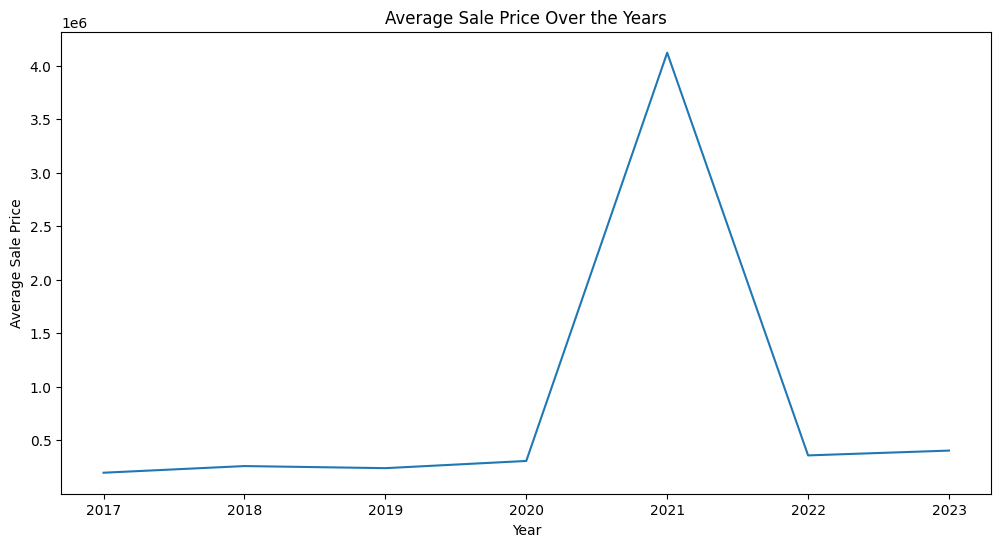

In [ ]:
#1 Pricing trends - How have real estate prices evolved over the years across various towns

def plot_pricing_trends(data):

    %matplotlib inline

    # Calculate yearly average sale prices
    yearly_sales = data.groupby('Year')['Sale Amount'].mean().reset_index()

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=yearly_sales, x='Year', y='Sale Amount')
    plt.title('Average Sale Price Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Average Sale Price')
    plt.show()

plot_pricing_trends(data)

<ipython-input-20-f1f5727b8d4c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sales, x='Month', y='Sale Amount', palette='coolwarm')


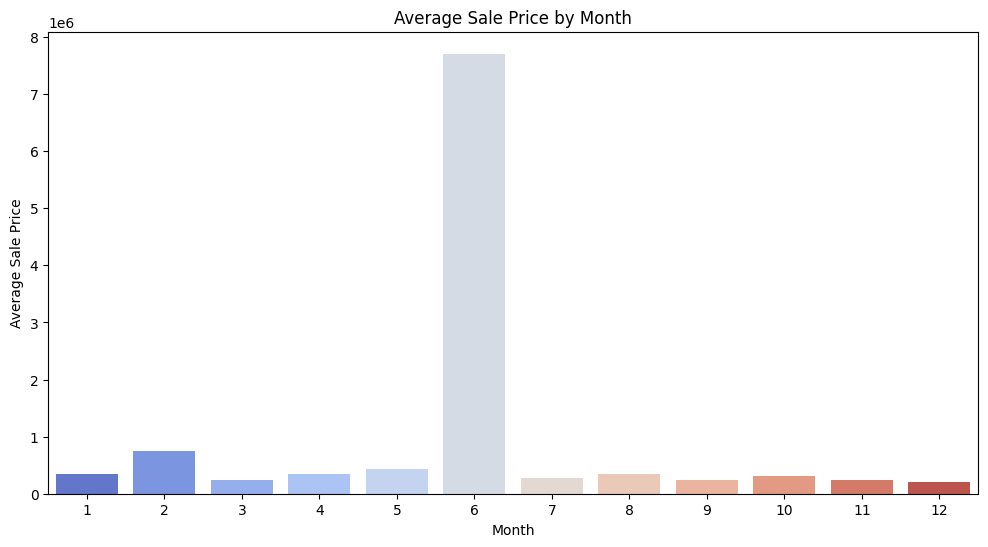

In [ ]:
#2 Seasonal trends - Are there seasonal trends in sales or prices?

def plot_seasonal_trends(data):
    data['Month'] = data['Date Recorded'].dt.month
    monthly_sales = data.groupby('Month')['Sale Amount'].mean().reset_index()
    plt.figure(figsize=(12, 6))
    sns.barplot(data=monthly_sales, x='Month', y='Sale Amount', palette='coolwarm')
    plt.title('Average Sale Price by Month')
    plt.xlabel('Month')
    plt.ylabel('Average Sale Price')


    plt.show()


plot_seasonal_trends(data)

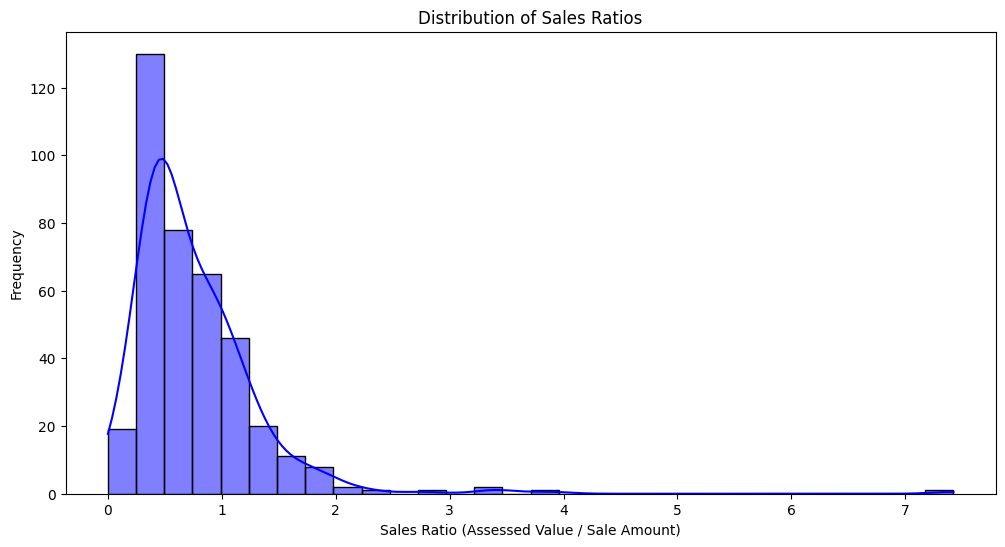

In [ ]:
#3 Valuation Accuracy - How accurate are the assessed values as compared to the actual sale value?

def plot_valuation_accuracy(data):
    data['Sales Ratio'] = data['Assessed Value'] / data['Sale Amount']
    plt.figure(figsize=(12, 6))
    sns.histplot(data['Sales Ratio'], kde=True, bins=30, color='blue')
    plt.title('Distribution of Sales Ratios')
    plt.xlabel('Sales Ratio (Assessed Value / Sale Amount)')
    plt.ylabel('Frequency')
    plt.show()

plot_valuation_accuracy(data)

<ipython-input-22-f8f1b1d1510c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=town_ratios.index, x=town_ratios.values, palette='coolwarm')


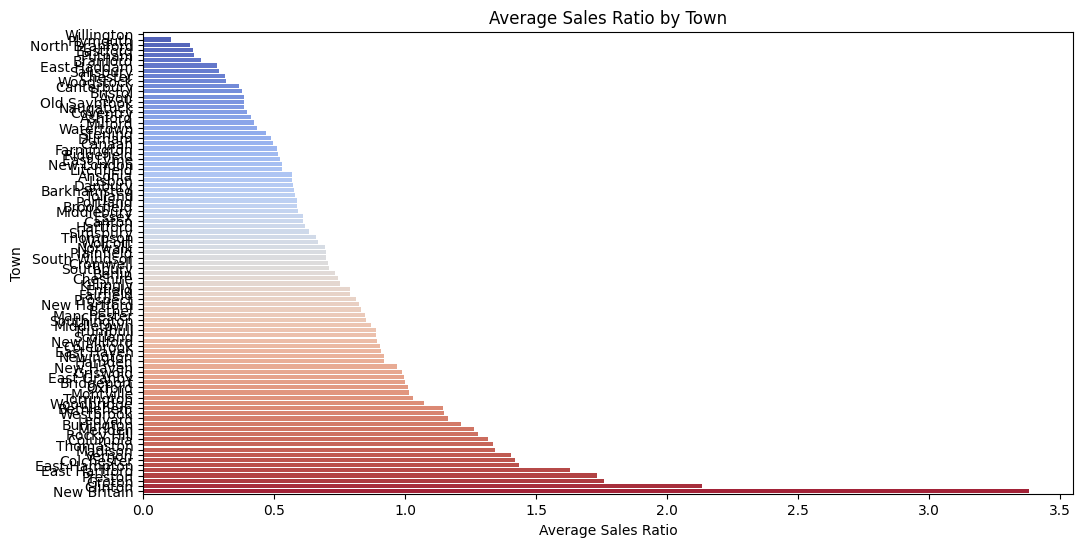

<ipython-input-22-f8f1b1d1510c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=property_ratios.index, y=property_ratios.values, palette='viridis')


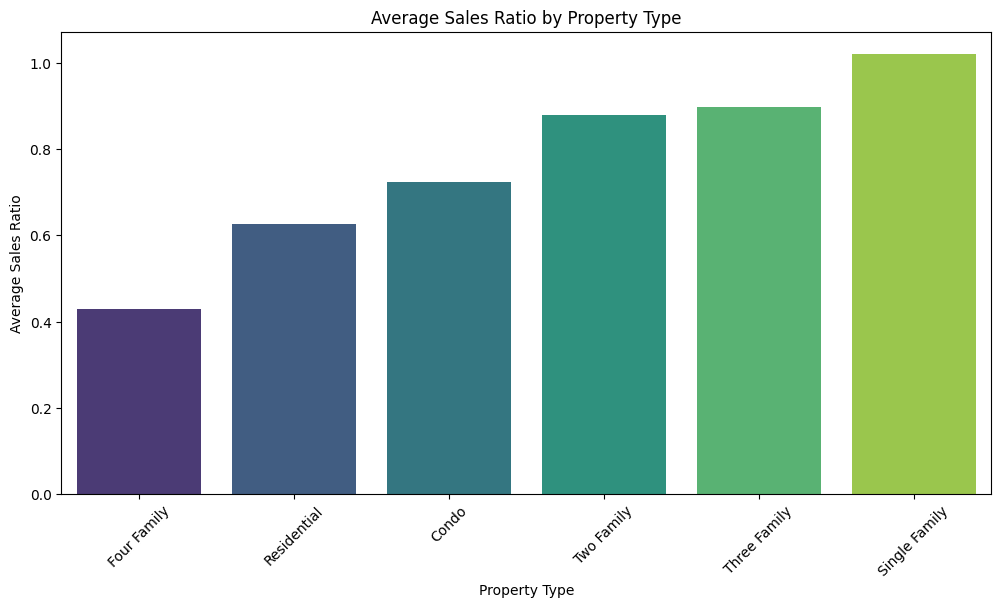

In [ ]:
#4 Are there any significant deviations in the towns and property types?

def analyze_deviations(data):
    # Sales Ratio by Town
    town_ratios = data.groupby('Town')['Sales Ratio'].mean().sort_values()
    plt.figure(figsize=(12, 6))
    sns.barplot(y=town_ratios.index, x=town_ratios.values, palette='coolwarm')
    plt.title('Average Sales Ratio by Town')
    plt.xlabel('Average Sales Ratio')
    plt.ylabel('Town')
    plt.show()

    # Sales Ratio by Property Type
    property_ratios = data.groupby('Property Type')['Sales Ratio'].mean().sort_values()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=property_ratios.index, y=property_ratios.values, palette='viridis')
    plt.title('Average Sales Ratio by Property Type')
    plt.xlabel('Property Type')
    plt.ylabel('Average Sales Ratio')
    plt.xticks(rotation=45)
    plt.show()

analyze_deviations(data)

In [ ]:
#5 Location based insights - Which towns or areas show the highest property appreciation?

def top_appreciating_towns(data):
    town_sales = data.groupby('Town')['Sale Amount'].mean().sort_values(ascending=False).head(10)
    print("\nTop 10 Towns by Average Sale Price:")
    print(town_sales)

top_appreciating_towns(data)



Top 10 Towns by Average Sale Price:
Town
Willington    3.187900e+08
Branford      3.500000e+06
East Lyme     2.111562e+06
New London    1.537000e+06
Middlebury    1.100000e+06
Putnam        9.350000e+05
Norwalk       7.478176e+05
Tolland       6.500000e+05
Essex         6.212500e+05
Farmington    6.078374e+05
Name: Sale Amount, dtype: float64


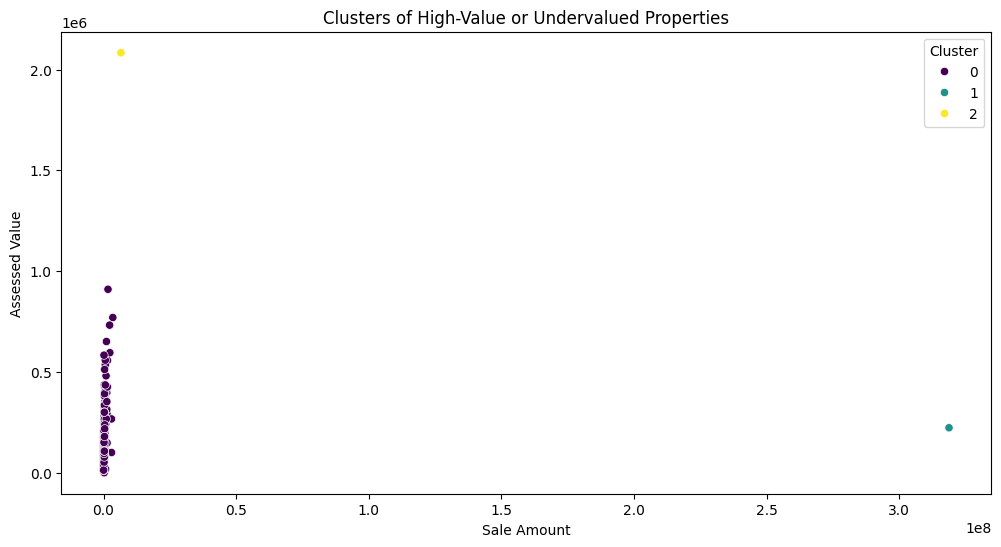

In [ ]:
#6 Are there any clusters of any high - valued or under - values properties?

def cluster_properties(data):
    # Ensure relevant columns are available
    clustering_data = data[['Sale Amount', 'Assessed Value']].dropna()

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(clustering_data)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clustering_data['Cluster'] = kmeans.fit_predict(scaled_data)

    # Add clusters back to the original data
    data['Cluster'] = clustering_data['Cluster']

    # Visualize clusters
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=clustering_data, x='Sale Amount', y='Assessed Value', hue='Cluster', palette='viridis')
    plt.title('Clusters of High-Value or Undervalued Properties')
    plt.xlabel('Sale Amount')
    plt.ylabel('Assessed Value')
    plt.legend(title='Cluster')
    plt.show()

cluster_properties(data)


<ipython-input-28-01cf64e45e1a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=property_sales, x='Property Type', y='Sale Amount', palette='viridis')


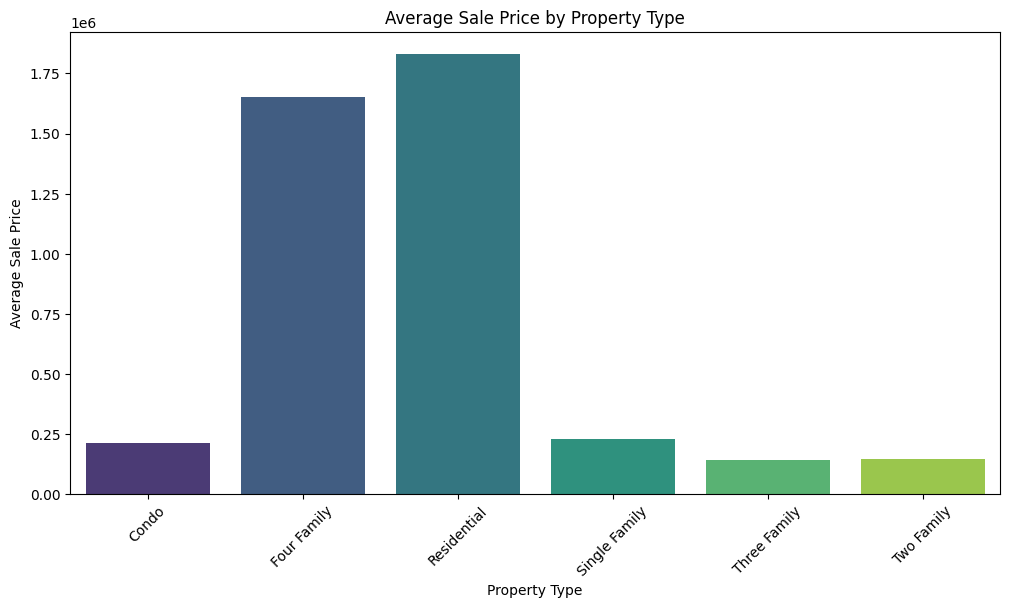

In [ ]:
#7 Property type performance - which property types are most in demand?

def property_type_performance(data):
    property_sales = data.groupby('Property Type')['Sale Amount'].mean().reset_index()
    plt.figure(figsize=(12, 6))
    sns.barplot(data=property_sales, x='Property Type', y='Sale Amount', palette='viridis')
    plt.title('Average Sale Price by Property Type')
    plt.xlabel('Property Type')
    plt.ylabel('Average Sale Price')
    plt.xticks(rotation=45)
    plt.show()

property_type_performance(data)

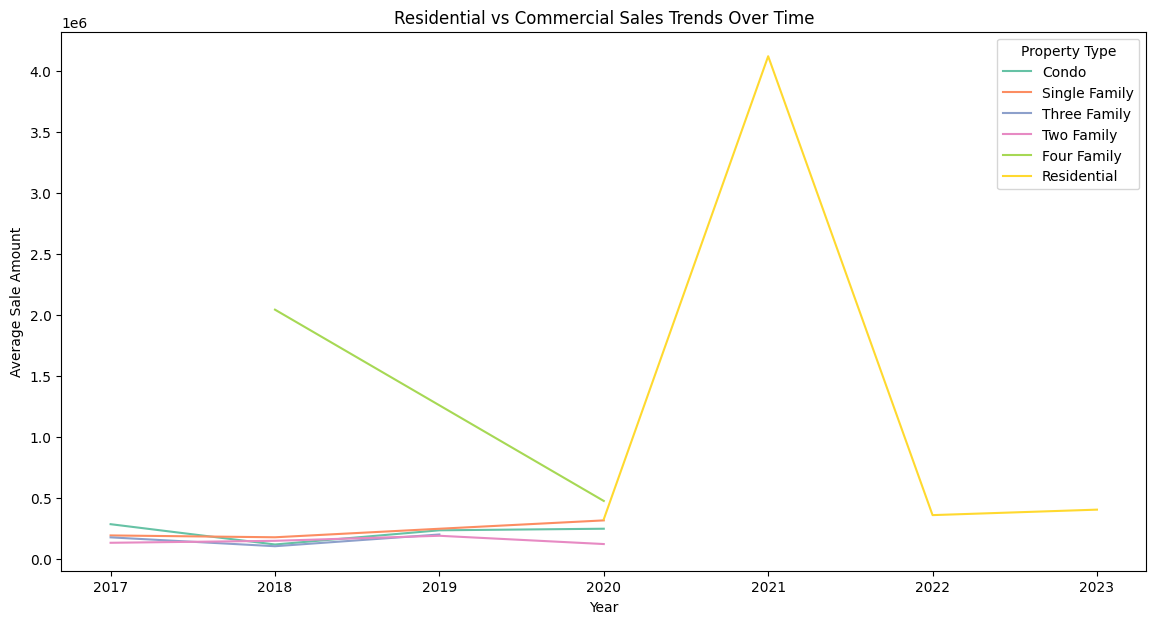

In [ ]:
#8 How do residential and commercial properties compare in sales trends?

def compare_residential_commercial(data):
    if 'Property Type' in data.columns:
        property_trends = data.groupby(['Year', 'Property Type'])['Sale Amount'].mean().reset_index()
        plt.figure(figsize=(14, 7))
        sns.lineplot(data=property_trends, x='Year', y='Sale Amount', hue='Property Type', palette='Set2')
        plt.title('Residential vs Commercial Sales Trends Over Time')
        plt.xlabel('Year')
        plt.ylabel('Average Sale Amount')
        plt.legend(title='Property Type')
        plt.show()
    else:
        print("Property Type data not available.")

compare_residential_commercial(data)

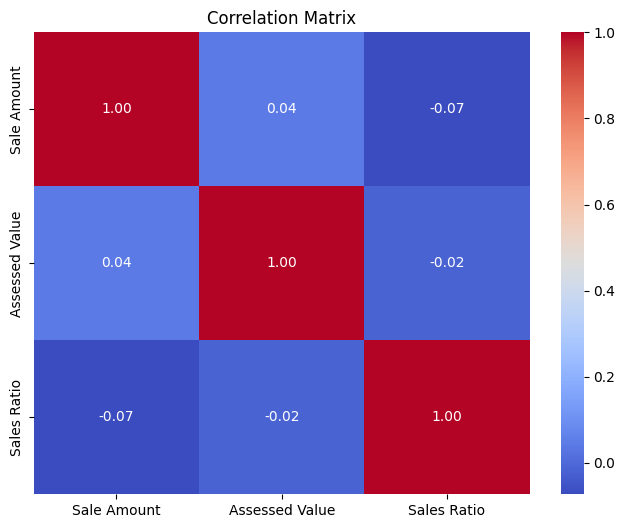

In [ ]:
#9 Factors influencing sales

def correlation_analysis(data):
    numeric_cols = ['Sale Amount', 'Assessed Value', 'Sales Ratio']
    correlation_matrix = data[numeric_cols].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

correlation_analysis(data)